# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = btc_response_data['data']['1']['quotes']['USD']['price'] * my_btc
my_eth_value = eth_response_data['data']['1027']['quotes']['USD']['price'] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27436.80
The current value of your 5.3 ETH is $8319.62


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = float(200)
my_spy = float(50)
# confirm float type
type(my_agg)

float

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version ="v2"
)
   

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-01-27", tz="America/New_york").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"
start = pd.Timestamp("2023-01-27", tz="America/New_york").isoformat()
end = pd.Timestamp("2023-01-27", tz="America/New_york").isoformat()

# Get current closing prices for SPY and AGG
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today,
).df

ticker_data.head()

# Reorganize the DataFrame
# Separate ticker data
AGG = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
ticker_by_sym = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
ticker_by_sym.head()

AGG                                              \
                            open    high    low   close   volume trade_count   
timestamp                                                                      
2023-01-27 05:00:00+00:00  99.96  100.14  99.91  100.08  5123098       18192   

                                           SPY                          \
                                 vwap     open    high     low   close   
timestamp                                                                
2023-01-27 05:00:00+00:00  100.061411  403.655  408.16  403.44  405.68   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-01-27 05:00:00+00:00  68346180      496480  405.790293

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(ticker_by_sym['AGG']['close'])
spy_close_price = float(ticker_by_sym['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.08
Current SPY closing price: $405.68


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50.0 SPY shares is $20284.00
The current value of your 200.0 AGG shares is $20016.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
cryto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

data = {'amount':[cryto, shares]}

# Create savings DataFrame
df_savings = pd.DataFrame(data, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,35756.422
shares,40300.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

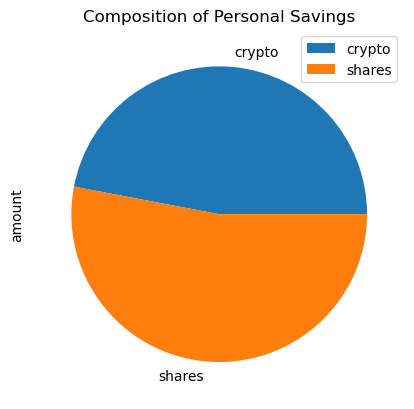

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y= "amount", title= "Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = cryto + shares
goal = emergency_fund - savings

# Validate saving health
if savings > emergency_fund:
    print("Congradulations, your funding in your Emergency Fund is great!" )
elif savings == emergency_fund:
    print("Congradulations, your have met you financial goals.")
else:
    print(f"You are ${goal:0.2f} from your Emergency Fund goal.")

Congradulations, your funding in your Emergency Fund is great!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-27', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-27', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
five_year_ticker_data = api.get_bars(
    tickers,
    timeframe,
    start_date,
    end_date,
).df

# to confirm data ---> five_year_ticker_data.head()

# Reorganize the DataFrame
# Separate ticker data
AGG_df = five_year_ticker_data[five_year_ticker_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY_df = five_year_ticker_data[five_year_ticker_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_df, SPY_df], axis=1, keys=['AGG', 'SPY'])


# Display sample data
df_stock_data.head()

AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2018-01-29 05:00:00+00:00  108.14  108.250  108.02  108.18   3974898   
2018-01-30 05:00:00+00:00  108.12  108.120  107.92  108.01   3659538   
2018-01-31 05:00:00+00:00  108.20  108.210  107.88  108.10   8066895   
2018-02-01 05:00:00+00:00  107.75  107.825  107.48  107.52  10330443   
2018-02-02 05:00:00+00:00  107.25  107.345  107.10  107.20   4779312   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2018-01-29 05:00:00+00:00       17162  108.140754  285.93  286.430  284.50   
2018-01-30 05:00:00+00:00       14454  108.010293  282.59  284.736  281.22   
2018-01-31 05:00:00+00:00       29280  108.033072  282.73  283.300  280.68   
2018-02-01 05:00:00+00:00       26477  107.695566  281.08  283.060  280.68   
2018-02-02 05:00:00+00:00       17781  107.197964  280.08  280.230  275.41   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-01-29 05:00:00+00:00  284.64   90206637      286719  285.443701  
2018-01-30 05:00:00+00:00  281.63  132075557      427207  282.425628  
2018-01-31 05:00:00+00:00  281.91  118954475      363005  281.967347  
2018-02-01 05:00:00+00:00  281.68   90622947      304909  281.766220  
2018-02-02 05:00:00+00:00  275.51  175825647      548623  277.434737

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_sixty_fourty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_sixty_fourty.portfolio_data.head()

AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2018-01-29 05:00:00+00:00  108.14  108.250  108.02  108.18   3974898   
2018-01-30 05:00:00+00:00  108.12  108.120  107.92  108.01   3659538   
2018-01-31 05:00:00+00:00  108.20  108.210  107.88  108.10   8066895   
2018-02-01 05:00:00+00:00  107.75  107.825  107.48  107.52  10330443   
2018-02-02 05:00:00+00:00  107.25  107.345  107.10  107.20   4779312   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-01-29 05:00:00+00:00       17162  108.140754          NaN  285.93   
2018-01-30 05:00:00+00:00       14454  108.010293    -0.001571  282.59   
2018-01-31 05:00:00+00:00       29280  108.033072     0.000833  282.73   
2018-02-01 05:00:00+00:00       26477  107.695566    -0.005365  281.08   
2018-02-02 05:00:00+00:00       17781  107.197964    -0.002976  280.08   

                                                                           \
                              high     low   close     volume trade_count   
timestamp                                                                   
2018-01-29 05:00:00+00:00  286.430  284.50  284.64   90206637      286719   
2018-01-30 05:00:00+00:00  284.736  281.22  281.63  132075557      427207   
2018-01-31 05:00:00+00:00  283.300  280.68  281.91  118954475      363005   
2018-02-01 05:00:00+00:00  283.060  280.68  281.68   90622947      304909   
2018-02-02 05:00:00+00:00  280.230  275.41  275.51  175825647      548623   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-01-29 05:00:00+00:00  285.443701          NaN  
2018-01-30 05:00:00+00:00  282.425628    -0.010575  
2018-01-31 05:00:00+00:00  281.967347     0.000994  
2018-02-01 05:00:00+00:00  281.766220    -0.000816  
2018-02-02 05:00:00+00:00  277.434737    -0.021904

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sixty_fourty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


D:\Local_Fintech\GitLab-Ldock\NU-VIRT-FIN-PT-12-2022-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999759,0.984764,0.992089,0.996311,0.990239,0.989457,0.993960,0.995156,0.993380,0.998644,...,1.008942,0.999755,1.006590,0.993443,1.001053,0.987522,0.995441,0.995097,1.008587,0.995210
2,0.989486,0.997984,0.995402,0.995586,0.994829,0.990692,0.988040,0.996942,1.000692,0.986179,...,1.011604,1.001291,1.006545,0.986879,1.001685,0.988005,0.994462,0.983696,1.006678,0.985275
3,0.989117,1.004701,0.992915,1.002171,1.000235,0.997333,0.987203,1.000941,0.993915,0.985795,...,1.000376,1.008971,1.004721,0.988326,1.006930,0.984103,1.011571,0.982387,0.991700,0.975873
4,0.986961,1.005842,1.002432,0.983742,0.990330,0.995854,0.991080,0.986733,0.998995,1.010462,...,0.994839,1.006045,1.001671,0.984156,1.005484,0.986746,1.012848,0.982257,0.981191,0.977553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.994404,3.172481,2.781617,1.791338,1.014542,6.570135,1.384246,3.436232,5.583878,2.120603,...,2.914211,1.338589,1.657781,2.382455,2.646662,1.763919,3.329335,1.509207,6.202715,1.998164
7557,4.958075,3.165533,2.781123,1.801178,1.009063,6.643010,1.388057,3.395400,5.605115,2.120830,...,2.855862,1.334662,1.647915,2.382850,2.645291,1.772610,3.335280,1.524912,6.129470,2.012030
7558,4.862854,3.118105,2.768669,1.814890,1.002766,6.695940,1.375153,3.401090,5.633891,2.109700,...,2.898053,1.340102,1.633095,2.387832,2.632722,1.735675,3.359624,1.527845,6.076129,2.005184
7559,4.851184,3.132166,2.761802,1.807486,1.006891,6.652044,1.351002,3.408244,5.737680,2.117691,...,2.891223,1.329923,1.627452,2.403797,2.615189,1.742602,3.376722,1.529940,6.052258,2.015822


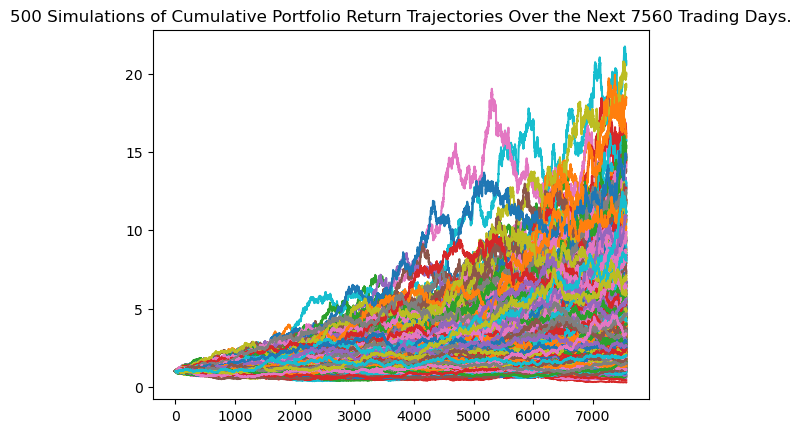

In [20]:
# Plot simulation outcomes
line_plot = MC_sixty_fourty.plot_simulation()

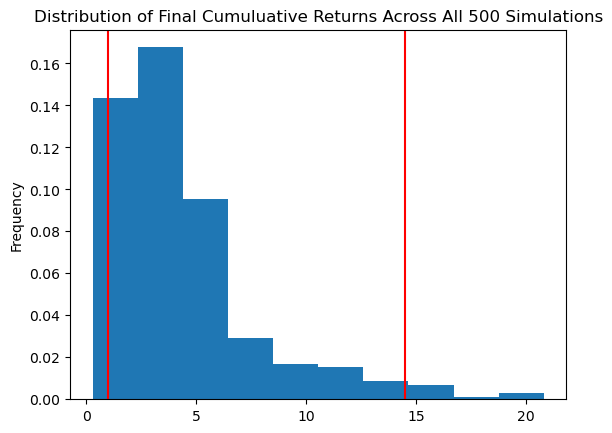

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sixty_fourty.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
sixty_fourty_table = MC_sixty_fourty.summarize_cumulative_return()

# Print summary statistics
print(sixty_fourty_table)

count           500.000000
mean              4.330651
std               3.370980
min               0.291323
25%               2.130831
50%               3.338476
75%               5.309447
max              20.806688
95% CI Lower      0.960594
95% CI Upper     14.487581
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sixty_fourty_table[8] * initial_investment,2)
ci_upper = round(sixty_fourty_table[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19211.87 and $289751.62


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sixty_fourty_table[8] * initial_investment,2)
ci_upper = round(sixty_fourty_table[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28817.81 and $434627.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_early_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10, .90],
    num_simulation = num_sims,
    num_trading_days = 252*5
)


In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_early_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


D:\Local_Fintech\GitLab-Ldock\NU-VIRT-FIN-PT-12-2022-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998229,1.016314,0.991194,1.009057,0.991399,1.014139,0.999253,1.001188,1.016739,0.993876,...,0.998944,1.004638,1.009539,0.990730,1.011070,0.976720,0.991482,0.989488,0.988163,0.995787
2,0.994476,1.012327,1.006632,0.997483,0.982930,1.008775,0.996033,1.011925,1.014565,0.989581,...,0.977728,1.002213,1.008789,0.988956,0.997720,0.985834,0.982574,0.996707,0.975819,0.985964
3,0.990989,1.002900,1.003686,1.010562,0.974935,1.019201,1.003865,1.031759,1.005046,1.004695,...,0.991506,0.996091,1.017787,0.975756,1.005368,0.991317,0.958240,0.999554,0.979537,0.982424
4,0.977682,1.000405,1.002716,0.990868,0.976595,1.018531,1.000225,1.042892,0.992455,1.023672,...,0.984150,0.981861,1.022420,0.947617,0.998721,0.996415,0.975392,1.018653,0.973686,1.001788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.578860,1.294536,1.329646,4.557363,1.129458,0.846055,0.919313,0.993098,1.743473,0.837183,...,1.218011,1.948764,1.054044,1.224971,3.543831,1.798655,1.052798,1.108913,1.298134,1.475853
1257,1.582828,1.309336,1.340717,4.527254,1.128327,0.859527,0.926936,1.008137,1.725288,0.838834,...,1.216965,1.944600,1.071212,1.245028,3.522199,1.805913,1.060833,1.119813,1.267631,1.456549
1258,1.587637,1.304604,1.351522,4.606815,1.128654,0.850939,0.927963,0.994106,1.699464,0.829412,...,1.215590,1.944726,1.073713,1.243883,3.551289,1.803950,1.068987,1.126784,1.256463,1.445661
1259,1.577732,1.331048,1.357216,4.521907,1.109709,0.859541,0.930744,1.004625,1.732349,0.824620,...,1.193869,1.891823,1.057456,1.253216,3.572168,1.807490,1.069352,1.123809,1.263688,1.448385


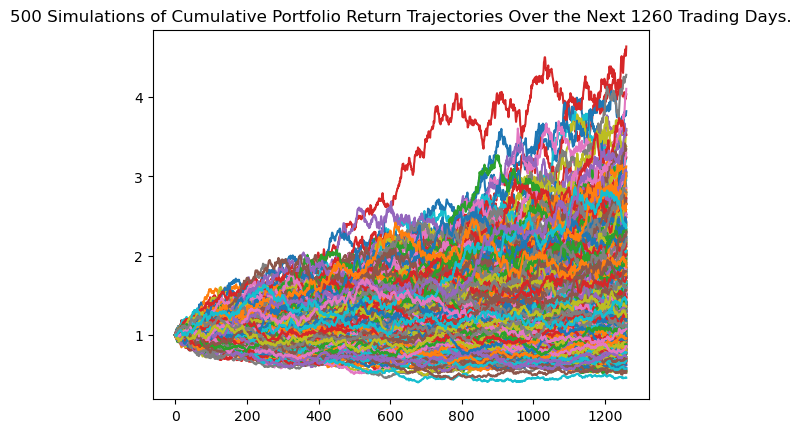

In [27]:
# Plot simulation outcomes
line_plot = MC_early_five.plot_simulation()

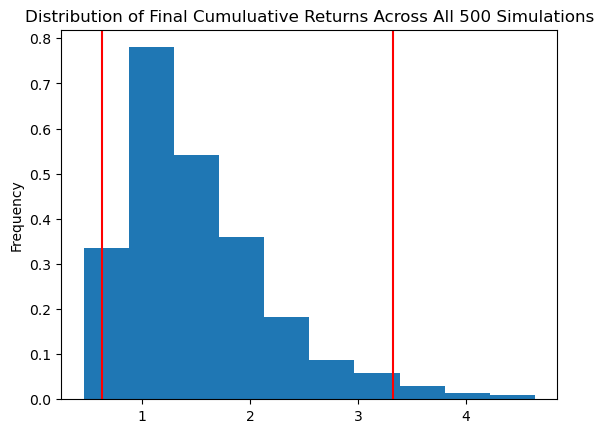

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_early_five.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
early_five = MC_early_five.summarize_cumulative_return()

# Print summary statistics
print(early_five)

count           500.000000
mean              1.512681
std               0.683127
min               0.459636
25%               1.029081
50%               1.363011
75%               1.822473
max               4.638307
95% CI Lower      0.628113
95% CI Upper      3.321036
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment= 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(early_five[8] * initial_investment,2)
ci_upper_five = round(early_five[9] * initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $25124.54 and $132841.46


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_early_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_early_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


D:\Local_Fintech\GitLab-Ldock\NU-VIRT-FIN-PT-12-2022-U-LOLC\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006233,0.993809,0.991804,0.994108,1.007261,1.000129,0.978634,1.006832,1.003595,0.984478,...,1.001675,1.009870,0.998717,0.998899,0.995902,0.992275,1.016061,0.997729,0.998630,1.010089
2,1.027212,0.977438,0.991093,0.985683,0.993618,1.007424,0.994713,1.016515,1.012515,0.971994,...,0.986005,1.005104,0.989851,1.006195,0.984038,1.001898,1.020509,0.994676,0.993760,1.022376
3,1.026056,0.974510,1.003384,0.966944,0.992420,0.995065,0.985924,1.009958,1.007888,0.967620,...,0.985502,1.006762,1.003184,1.002374,0.979281,0.991924,1.006151,1.000908,1.014669,1.025351
4,1.032015,0.999561,1.013895,0.981834,0.983483,1.005179,0.985986,1.016865,0.998005,0.957696,...,0.987347,0.998620,0.996987,0.998029,0.997655,0.995644,0.995921,1.015066,1.018191,1.006509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.564113,1.149376,2.452517,3.844849,0.778876,1.198634,1.488238,1.556199,1.863535,1.666802,...,1.805513,1.229100,4.483985,2.576811,0.759293,1.942537,3.314610,1.834643,2.574078,1.499530
2517,1.581845,1.169261,2.485229,3.853170,0.773892,1.193428,1.487176,1.557941,1.820161,1.666022,...,1.790836,1.224143,4.447216,2.542726,0.767982,1.960288,3.321018,1.833395,2.590633,1.518871
2518,1.592491,1.169186,2.539256,3.831674,0.778509,1.203864,1.462493,1.593181,1.845560,1.640198,...,1.790790,1.211109,4.417658,2.509587,0.762865,1.955443,3.378362,1.820534,2.577135,1.524785
2519,1.580124,1.180839,2.567462,3.833943,0.777043,1.207183,1.456561,1.596052,1.820689,1.641481,...,1.776049,1.215995,4.455949,2.520766,0.751786,1.963560,3.382105,1.823421,2.569919,1.536815


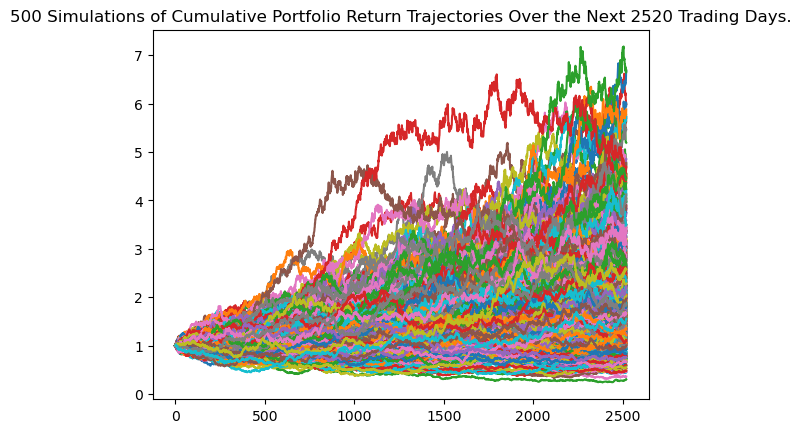

In [34]:
# Plot simulation outcomes
line_plot = MC_early_ten.plot_simulation()

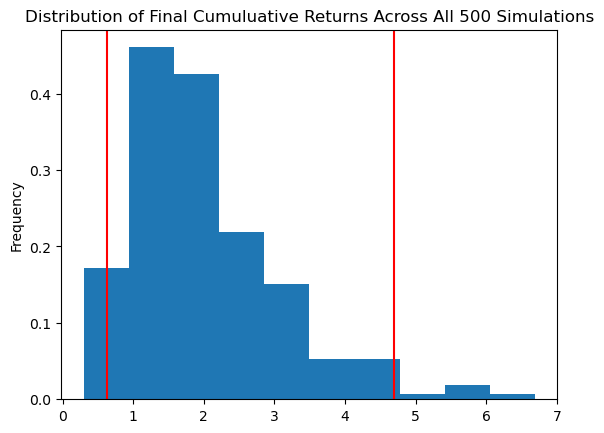

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_early_ten.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
early_ten = MC_early_ten.summarize_cumulative_return()

# Print summary statistics - Using display() to learn another way.
display(early_ten)

count           500.000000
mean              2.009602
std               1.081277
min               0.302744
25%               1.230796
50%               1.768255
75%               2.496831
max               6.686059
95% CI Lower      0.630077
95% CI Upper      4.689929
Name: 2520, dtype: float64

In [39]:
# Set initial investment
initial_investment = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(early_ten[8] * initial_investment,2)
ci_upper_ten = round(early_ten[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $25203.08 and $187597.17
